<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise_8_8_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dataset with brain atlas B**: use the Oasis dataset to predict the continuous age based on structural brain scans

``Task 8:`` Analogous to task 3 but plotting outcome metrics suited to continuous outcomes: a) r2 score, b) mean absolute error and c) explained variance score, as well as d) mean-squared error. 

In [ ]:
%%capture
!pip install nilearn

In [ ]:
%%capture
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib

In [ ]:
%%capture
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

In [ ]:
%%capture
from IPython import display
display.set_matplotlib_formats('svg')

In [ ]:
# We prepare the variable where we will store the model fits
ridge_test_r2 = []
ridge_test_MAE = []
ridge_test_expvar = []
ridge_test_MSE = []

In [ ]:
# We import the data first in order to select the last 10 subjects
%%capture
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 1) # fix this at 1
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] 

In [ ]:
# We prepare the models with the required parameters
logreg = Ridge()

In [ ]:
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)
X_test = X_scaled[90:100]
y_test = y[90:100]
X_train = X_scaled[0:90]
y_train = y[0:90]

In [ ]:
number = list(range(0,9))
sample = [10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
%%capture
for i in number:
    RidgeReg = logreg.fit(X_train[0:sample[i]],y_train[0:sample[i]]) # We fit the ridge training model
    y_pred = RidgeReg.predict(X_test) # We predict X_test based on RidgeReg
    
    score_1 = RidgeReg.score(X_test,y_test)
    score_2 = mean_absolute_error(y_test,y_pred)
    score_3 = explained_variance_score(y_test,y_pred)        
    score_4 = mean_squared_error(y_test,y_pred)
    ridge_test_r2.append(score_1) # We store the scores
    ridge_test_MAE.append(score_2) 
    ridge_test_expvar.append(score_3) 
    ridge_test_MSE.append(score_4) 

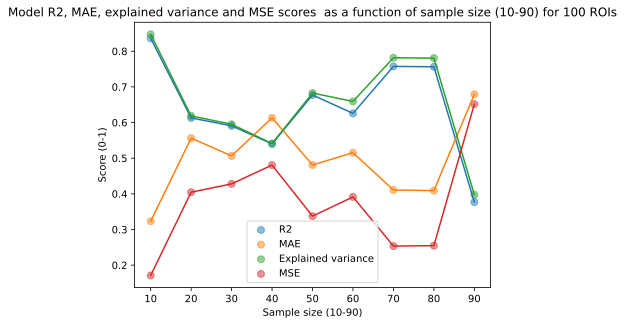

In [ ]:
# We're ready to plot
lab = ['R2', 'MAE', 'Explained variance', 'MSE']
plt.style.use("default")
plt.scatter(sample,ridge_test_r2, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,ridge_test_MAE, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,ridge_test_expvar, s=50, alpha = 0.5, marker = 'o')
plt.scatter(sample,ridge_test_MSE, s=50, alpha = 0.5, marker = 'o')
plt.legend(labels=(lab))
plt.gca().set(
    title="Model R2, MAE, explained variance and MSE scores  as a function of sample size (10-90) for 100 ROIs",
    xlabel="Sample size (10-90)",
    ylabel="Score (0-1)",
    xticks = (sample)
)
plt.plot(sample,ridge_test_r2)
plt.plot(sample,ridge_test_MAE)
plt.plot(sample,ridge_test_expvar)
plt.plot(sample,ridge_test_MSE)
plt.show()